In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

df = pd.read_csv('resources/transactions_2.csv')

df

In [ ]:
from prophet import Prophet

df['time'] = pd.to_datetime(df['time'], format='%Hh %M')


train_status = df.loc[(df['status'] == 'reversed') | (df['status'] == 'failed')]
train = train_status.groupby([train_status['time'].dt.hour]).mean()
train = train.reset_index()

train = train[['time', 'count']].rename({'time':'ds', 'count':'y'}, axis='columns')
train['ds'] = pd.to_datetime(train['ds'], format='%H')

In [3]:
train.shape

(23, 2)

In [ ]:
train.info()

In [ ]:
m = Prophet(changepoint_range=0.95)

m.fit(train)

In [ ]:
future = m.make_future_dataframe(periods=22, freq='H')
future.tail(35)

In [ ]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

In [8]:
results=pd.concat([train.set_index('ds')['y'],forecast.set_index('ds')[['yhat','yhat_lower','yhat_upper']]],axis=1)

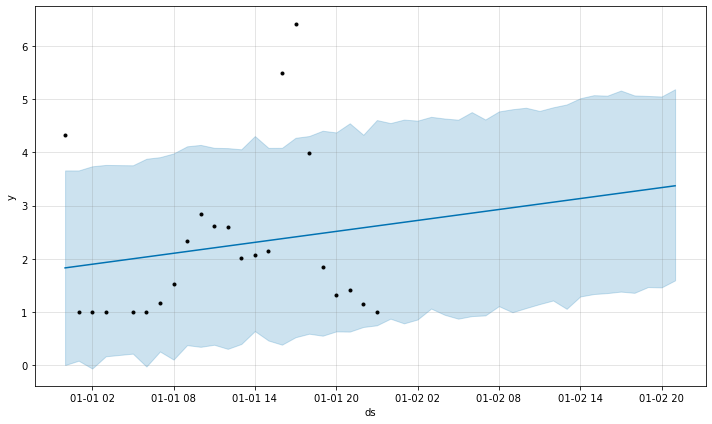

In [9]:
fig1 = m.plot(forecast)

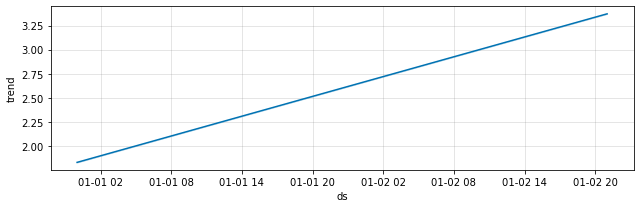

In [10]:
comp = m.plot_components(forecast)

In [ ]:
results

In [12]:
results['error'] = results['y'] - results['yhat']

In [13]:
results['uncertainty'] = results['yhat_upper'] - results['yhat_lower']

In [ ]:
results

In [ ]:
results[results['error']].abs() > 1.5*results['uncertainty']